In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print(".", end="")
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end="")
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print()
    return df

In [3]:
# Load Ar39
dirin = os.path.join("..", "..", "Data", "ar39", "07-01-2020-2Maps", "Ar39_2Maps_Sliced")
prefix = "Snapshot*csv"

df_ar39 = load_dataframe_from_files(dirin, prefix, max_files=30)
df_ar39 = df_ar39[df_ar39.columns[:-1]]
df_ar39 = df_ar39[df_ar39.pedetected>0]

..............................


In [4]:
# Load Muons
dirin = os.path.join("..", "..", "Data", "MuonsROI", "07-01-2020-2Maps", "Muons_2Maps_Sliced")
prefix = "Snapshot*csv"

df_mu = load_dataframe_from_files(dirin, prefix, max_files=100)
df_mu = df_mu[df_mu.columns[:-1]]
df_mu = df_mu[df_mu.pedetected>0]

....................................................................................................


In [5]:
print("[Info] Loaded {} Ar39 instances".format(len(df_ar39)))
print("[Info] Loaded {} Muons instances".format(len(df_mu)))

[Info] Loaded 139203 Ar39 instances
[Info] Loaded 14824 Muons instances


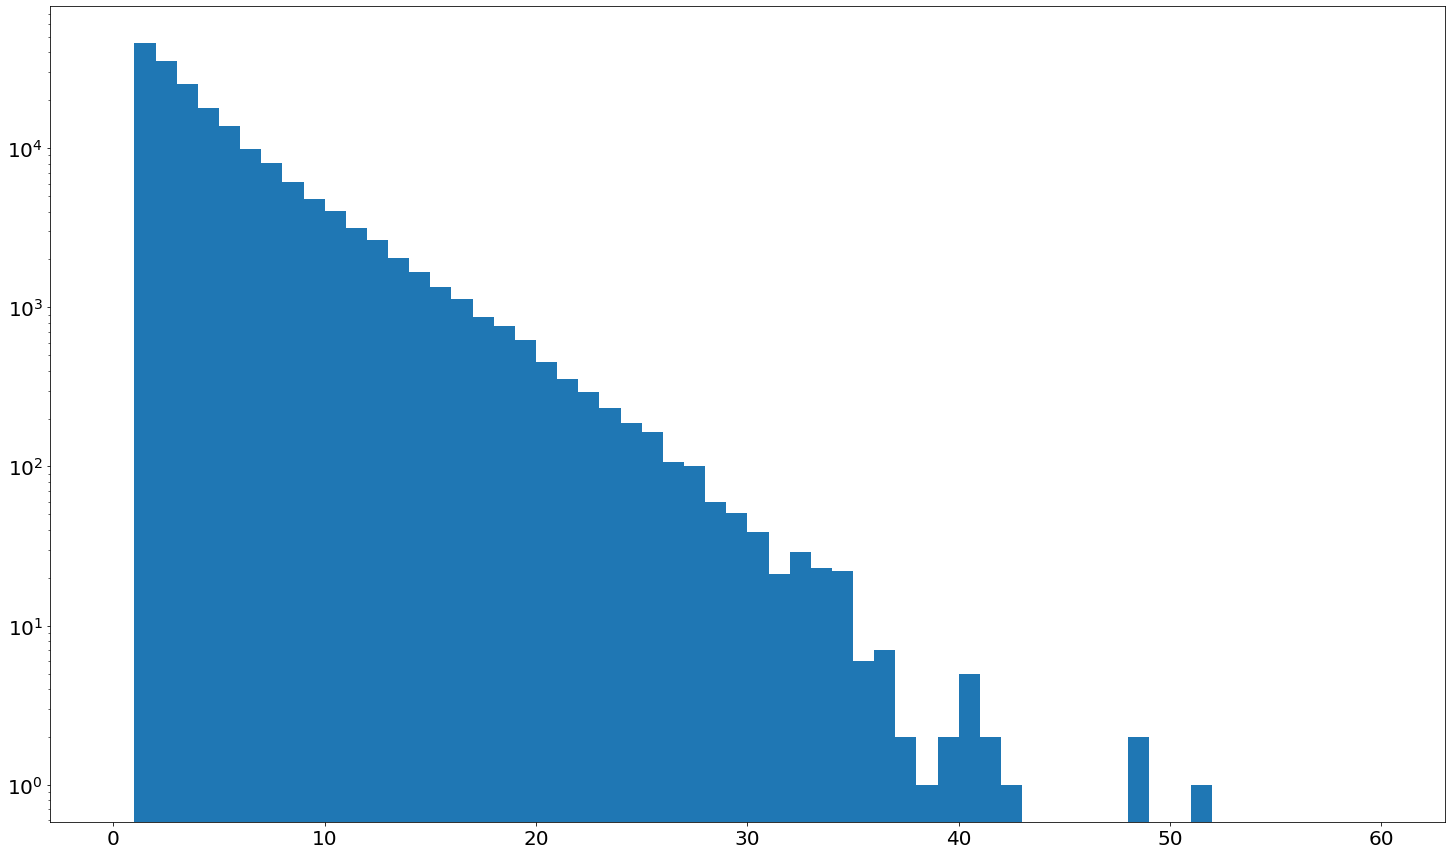

In [8]:
# Safety check: plot pe spectrum
bins = np.linspace(0, 60, 61)
plt.hist(df_ar39.pedetected, bins=bins)
plt.yscale("log")
plt.show()

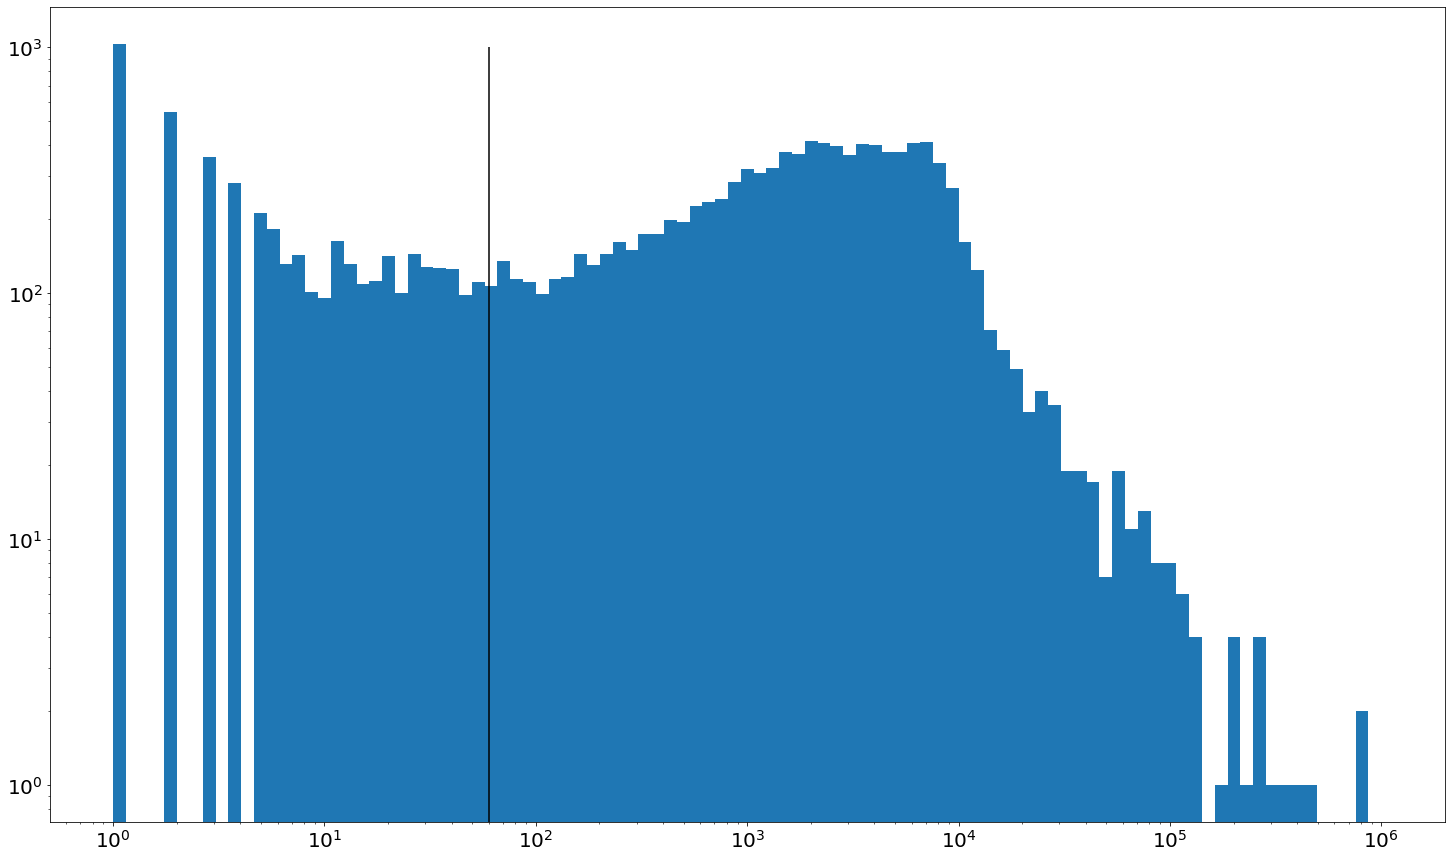

In [6]:
bins = np.logspace(0, 6, 100)
plt.hist(df_mu.pedetected, bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.vlines(60, ymin=0, ymax=1000)
plt.show()

# Spread of detections (after introducing the Spatial Map)

In [41]:
def stddev_idslices_fun(row):
    # given an array of aquisitions, it return the std of activated slices
    # it create a populaion of slice ids, and compute stddev on them
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.std(ids) if ids.shape[0]>0 else -1

In [42]:
mu_inner_std = df_mu.iloc[:, 3:15].apply(stddev_idslices_fun, axis=1)
mu_outer_std = df_mu.iloc[:, 15:].apply(stddev_idslices_fun, axis=1)

In [43]:
lemu_inner_std = df_mu[df_mu.pedetected<=60].iloc[:, 3:15].apply(stddev_idslices_fun, axis=1)
lemu_outer_std = df_mu[df_mu.pedetected<=60].iloc[:, 15:].apply(stddev_idslices_fun, axis=1)

In [44]:
ar39_inner_std = df_ar39.iloc[:, 3:15].apply(stddev_idslices_fun, axis=1)
ar39_outer_std = df_ar39.iloc[:, 15:].apply(stddev_idslices_fun, axis=1)

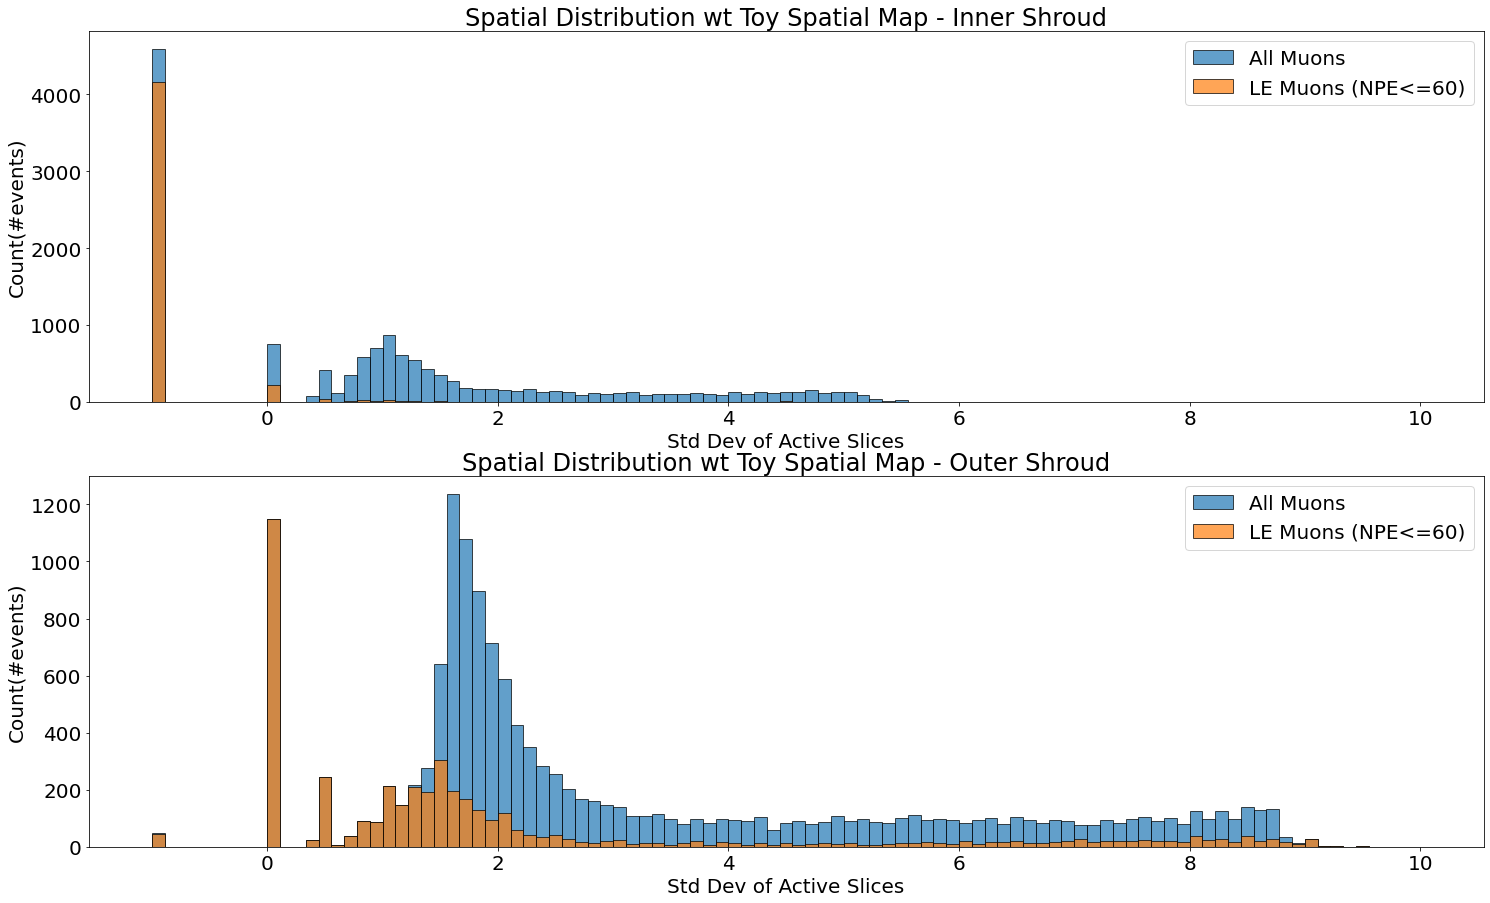

In [46]:
plt.subplot(2, 1, 1)
plt.hist(mu_inner_std, bins=np.linspace(-1, 10, 100), density=False, label="All Muons", alpha=0.7, edgecolor="k")
plt.hist(lemu_inner_std, bins=np.linspace(-1, 10, 100), density=False, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="k")
plt.title("Spatial Distribution wt Toy Spatial Map - Inner Shroud")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Count(#events)")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(mu_outer_std, bins=np.linspace(-1, 10, 100), density=False, label="All Muons", alpha=0.7, edgecolor="k")
plt.hist(lemu_outer_std, bins=np.linspace(-1, 10, 100), density=False, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="k")
plt.title("Spatial Distribution wt Toy Spatial Map - Outer Shroud")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Count(#events)")
plt.legend()
plt.show()

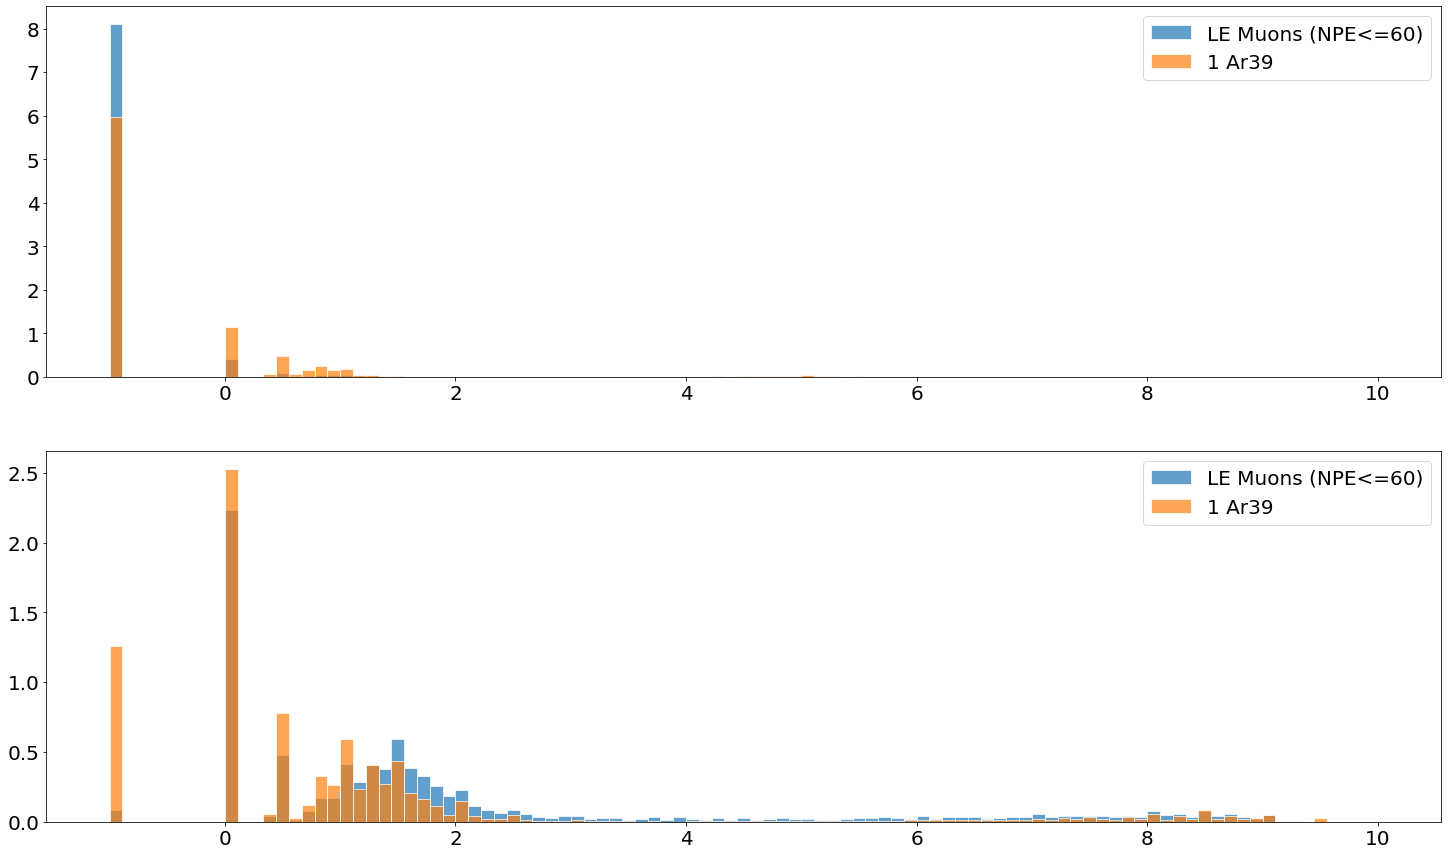

In [47]:
plt.subplot(2, 1, 1)
plt.hist(lemu_inner_std, bins=np.linspace(-1, 10, 100), density=True, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="w")
plt.hist(ar39_inner_std[:100000], bins=np.linspace(-1, 10, 100), density=True, label="1 Ar39", alpha=0.7, edgecolor="w")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(lemu_outer_std, bins=np.linspace(-1, 10, 100), density=True, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="w")
plt.hist(ar39_outer_std[:100000], bins=np.linspace(-1, 10, 100), density=True, label="1 Ar39", alpha=0.7, edgecolor="w")
plt.legend()

plt.show()

In [48]:
# Load 7 Ar39
dirin = os.path.join("..", "..", "Data", "ar39", "07-01-2020-2Maps", "Ar39_2Maps_Sliced")
prefix = "Snapshot7Ar39*csv"

df_7ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_7ar39 = df_7ar39[df_7ar39.columns[:-1]]
df_7ar39 = df_7ar39[df_7ar39.pedetected>0]

....................................................................................................


In [49]:
ar39_7_inner_std = df_7ar39.iloc[:, 3:15].apply(stddev_idslices_fun, axis=1)
ar39_7_outer_std = df_7ar39.iloc[:, 15:].apply(stddev_idslices_fun, axis=1)

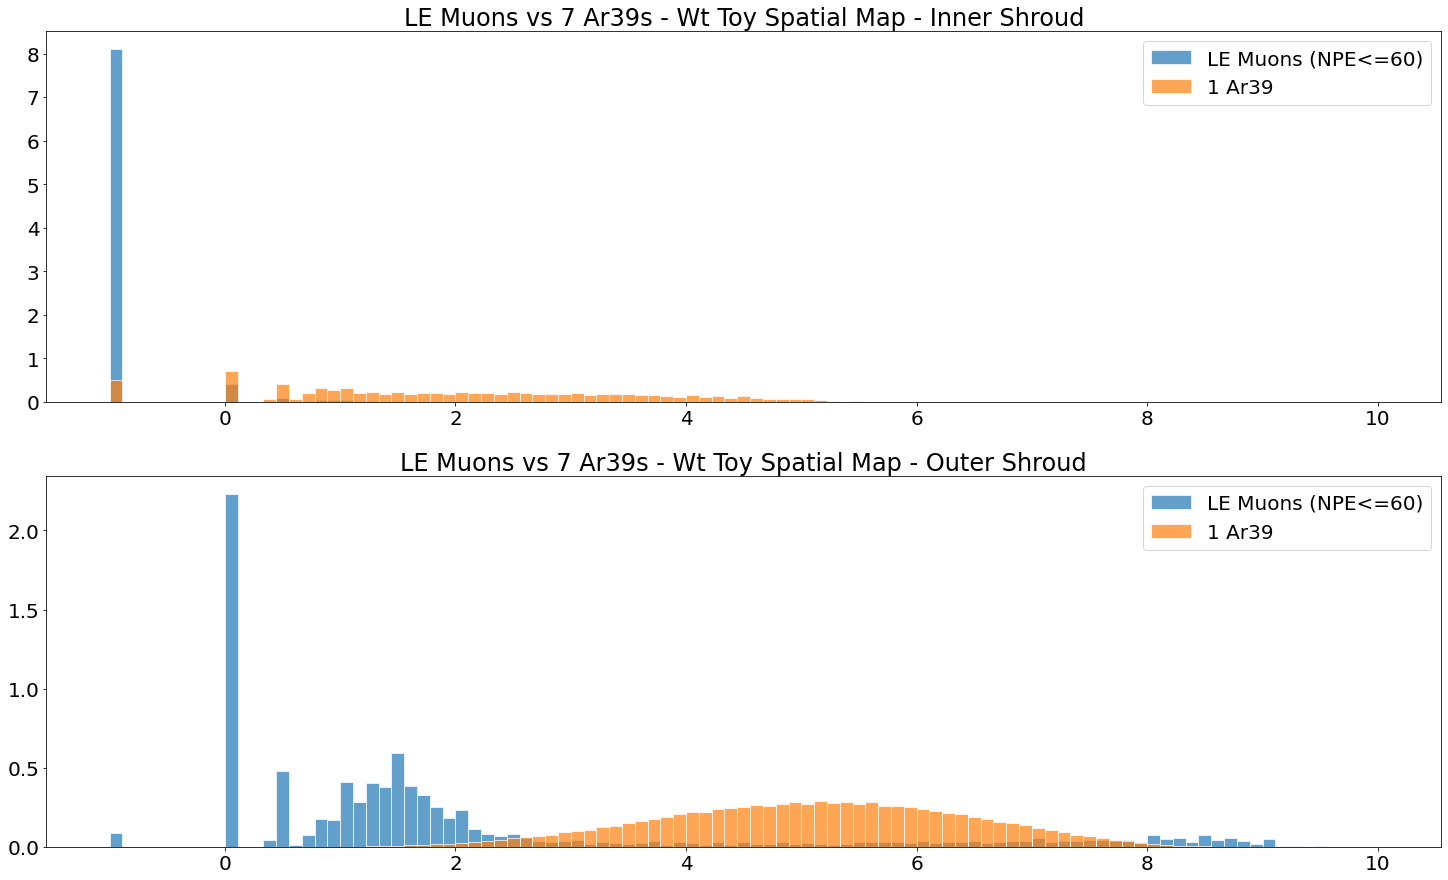

In [50]:
plt.subplot(2, 1, 1)
plt.hist(lemu_inner_std, bins=np.linspace(-1, 10, 100), density=True, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="w")
plt.hist(ar39_7_inner_std, bins=np.linspace(-1, 10, 100), density=True, label="1 Ar39", alpha=0.7, edgecolor="w")
plt.title("LE Muons vs 7 Ar39s - Wt Toy Spatial Map - Inner Shroud")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(lemu_outer_std, bins=np.linspace(-1, 10, 100), density=True, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="w")
plt.hist(ar39_7_outer_std, bins=np.linspace(-1, 10, 100), density=True, label="1 Ar39", alpha=0.7, edgecolor="w")
plt.title("LE Muons vs 7 Ar39s - Wt Toy Spatial Map - Outer Shroud")
plt.legend()
plt.show()

# Observations:
1. LE Muons mainly lead to detections in the outer shroud: 90% of LE Muons have no detections in the inner shroud. Only <1% of LE Muons have no detections in the outer shroud.
1. Ar39 are spread in the volume and their detections are in both the shrouds. 66% of 1Ar39 have 0 detections in the inner shroud. 14% of 1Ar39 have 0 detections in the outer shroud.